# ANCHORMEN ACADEMY
# EXCERCISES 1 - SOLUTIONS

## SECTION A


In [22]:
# loading libraries, some settings for plots

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append("..")

In [23]:
# load the data
from pathlib import Path
datafolder = Path("../data/raw")
df = pd.read_csv(datafolder / "cancer_data_uncleaned.csv", index_col="id")

Explore the data. Think of functions like `describe` or `info`. Take a good look at the columns, and clean up things that are obviously weird or wrong. Are there NaN's? Or exceptionally outliers, that are most likely a mistake?

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,570.0,14.126384,3.521017,6.981000,11.702500,13.375000,15.780000,28.11000
texture_mean,570.0,36.797912,418.026157,9.710000,16.172500,18.855000,21.807500,9999.00000
perimeter_mean,570.0,91.962158,24.278174,43.790000,75.180000,86.290000,104.025000,188.50000
area_mean,570.0,654.762456,351.617755,143.500000,420.300000,551.400000,782.675000,2501.00000
smoothness_mean,570.0,0.096358,0.014052,0.052630,0.086380,0.095865,0.105300,0.16340
compactness_mean,570.0,0.104307,0.052772,0.019380,0.065005,0.092525,0.130400,0.34540
concavity_mean,570.0,0.088795,0.079650,0.000000,0.029565,0.061545,0.130350,0.42680
concave points_mean,570.0,0.048912,0.038769,0.000000,0.020323,0.033600,0.073910,0.20120
symmetry_mean,570.0,0.181126,0.027403,0.106000,0.161900,0.179200,0.195675,0.30400
fractal_dimension_mean,570.0,0.062790,0.007056,0.049960,0.057725,0.061515,0.066120,0.09744


In [26]:
# the column with 'Unnamed: 32' should be dropped. It contains just NANs
df.drop('Unnamed: 32', axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values
labels = list(df.columns)
labels.remove('diagnosis')
assert X.shape[1] == len(labels)

Note how there is an outlier in the `texture_mean` feature.

In [28]:
df.texture_mean.describe()

count     570.000000
mean       36.797912
std       418.026157
min         9.710000
25%        16.172500
50%        18.855000
75%        21.807500
max      9999.000000
Name: texture_mean, dtype: float64

we can see there is an max value of 9999. I would remove this, because it is a)
a huge outliers in terms of variance b) a weird value that looks like a mistake.

In [29]:
idx = df.index[df.texture_mean == 9999]
df.drop(idx, inplace=True)

In [30]:
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values
labels = list(df.columns)
labels.remove('diagnosis')
assert X.shape[1] == len(labels)

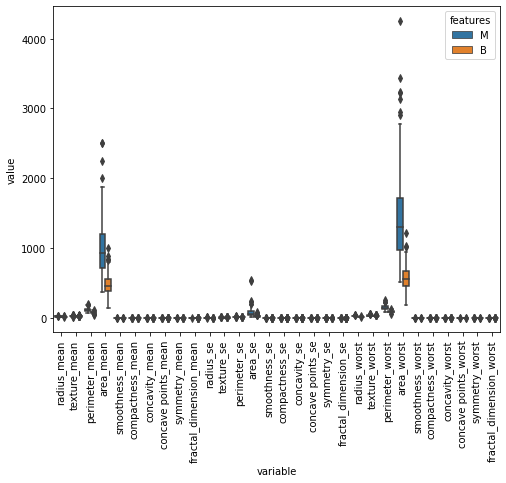

In [31]:
from src.visualization import visualize
visualize.melted_boxplot(X=X, y=y, labels=labels, labelname="features")

This looks much better

2021-11-22 13:38:21.799 | INFO     | src.data.make_dataset:scale:18 - Run standardscaler on data.


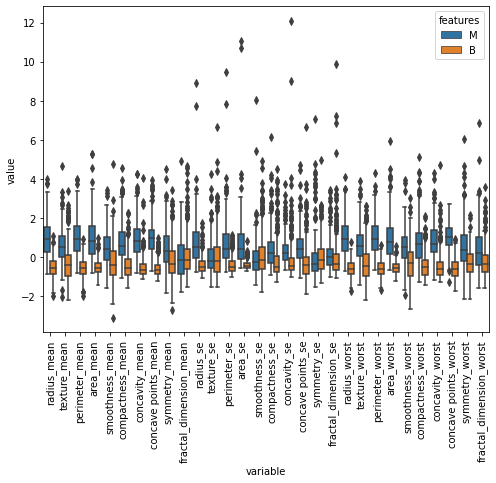

In [32]:
from src.data import  make_dataset
X = make_dataset.scale(X)
visualize.melted_boxplot(X=X, y=y, labels=labels, labelname="features")

This is a check. If it passes, you are done preprocessing

In [33]:
assert np.floor(np.sum(np.sum(X)) + np.sum(X.shape)) == 598.0

# Excercise
The preprocessing we have done so far is very senstive to errors. Now move all
the steps into a function, where the input is the path of the dataset and the
output is the cleaned and scaled dataset.

- Add a path for the output file (the `data/processed` folder) and also save the
file there. 
- Check for the existence of the preprocessed file with
  `outputfile.exists()`, which is a method for all Path objects from pathlib. If
  the file exists, skip the preprocessing and just load from disk.
- generalize the dropping of a column, such that you can provide a list of
  strings. If the columns exist, they will be dropped. If not, there should be
  no error.
- Drop the row with texture_mean as 9999. 
- add a logger for the steps in the process. 


````
def preprocess_cancer(datafile : Path, outputfile: Path) -> pd.DataFrame:
    ...
    return df
````


Clean up the weird things, split into $X$ and $y$, scale the data.
Check your result visually, eg with boxplots or a pairplot.

In [34]:
from src.data import  make_dataset
from typing import List, Tuple
from loguru import logger


def preprocess_cancer(
    datafile: Path,
    outputfile: Path,
    targetcol: str = "diagnosis",
    to_drop: List[str] = ["Unnamed: 32"]
) -> Tuple[np.ndarray, np.ndarray, List[str]]:
    """Preprocess data

    Args:
        datafile (Path): Path to raw datafile
        outputfile (Path): Outputpath for preprocessed data
        targetcol (str, optional): Targetcolumn. Defaults to "diagnosis".
        to_drop (List[str], optional): Columns to remove from raw data.
           Will check if the columns exist. Defaults to ["Unnamed: 32"].

    Returns:
        Tuple[np.ndarray, np.ndarray, List[str]]: Returns X, y and labels
    """
    if not outputfile.exists():
        logger.info(f"preprocessing {datafile.name}")

        df = pd.read_csv(datafile, index_col="id")

        for col in to_drop:
            if col in df.columns:
                logger.info(f"dropping {col}")
                df.drop(col, axis=1, inplace=True)
        
        idx = df.index[df.texture_mean == 9999]
        df.drop(idx, inplace=True)
        logger.info(f"Dropped row with index: {idx.values}")
        df.to_csv(outputfile)
        logger.info(f"Wrote preprocessed file to {outputfile}")
    else:
        logger.info(f"Reading {outputfile} from disk")
        df = pd.read_csv(outputfile, index_col="id")

    X = df.drop(targetcol, axis=1).values
    y = df[targetcol].values
    labels = list(df.columns)
    labels.remove(targetcol)
    X = make_dataset.scale(X)

    return X, y, labels

In [35]:
datafile = Path("../data/raw/cancer_data_uncleaned.csv")
outputfile = Path("../data/processed/cancer_preprocessed.csv")

X, y, labels = preprocess_cancer(datafile=datafile, outputfile=outputfile)

2021-11-22 13:38:30.125 | INFO     | __main__:preprocess_cancer:40 - Reading ../data/processed/cancer_preprocessed.csv from disk
2021-11-22 13:38:30.135 | INFO     | src.data.make_dataset:scale:18 - Run standardscaler on data.


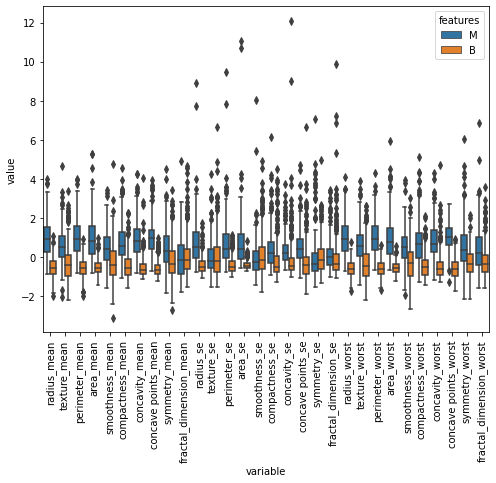

In [37]:
from src.visualization import visualize
visualize.melted_boxplot(X=X, y=y, labels=labels, labelname="features")

In [38]:
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
print(f"test:{accuracy_score(y_true, y_pred):.4f}")

test:0.5000


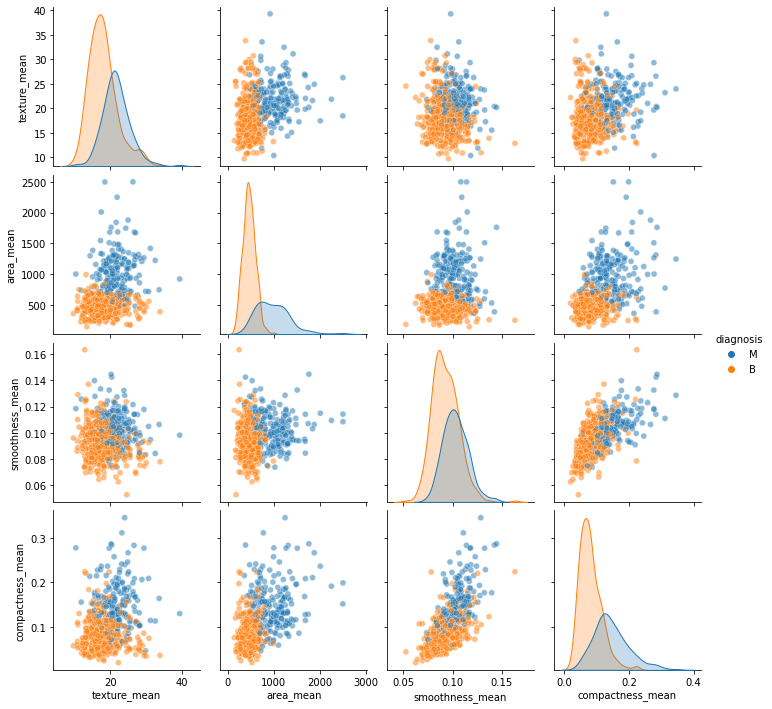

In [39]:
# do this just for a selection of features.
# it gives you a good idea of linear separability
sns.pairplot(df[['diagnosis', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']], 
             hue='diagnosis', plot_kws={'alpha' : 0.5});


Split into a train and test set. Use a `test_size` of 0.3. 

If you use `random_state` 4, you will get comparable results with the solutions.

In [40]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
X_train.shape

(398, 30)

Create a pipeline with a `StandardScaler` and a `SVC`

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Build pipeline
pipe = Pipeline(
    [
        ("scaler", StandardScaler()), # we add a scaler
        ("svm", SVC()) # and a model
    ]
)

Create a parameter grid for the svm in the pipeline. Start with logarithmic steps for the values.

In [42]:
# Set parameter grid
param_grid = {'svm__C': [10**x for x in range(-4,3)],
              'svm__gamma': [10**x for x in range(-4,3)]}

Create a GridSearchCV with the pipe. Fit on the trainset.

In [43]:
gridsearch = GridSearchCV(pipe, param_grid=param_grid, cv=3)

# Fit GridSearchCV
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'svm__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]})

In [44]:
print(gridsearch.best_score_)
print(gridsearch.score(X_test, y_test))
print(gridsearch.best_params_)

0.9748803827751195
0.9883040935672515
{'svm__C': 10, 'svm__gamma': 0.001}


Visualize the results with the `gridsearch_heatmap` function.

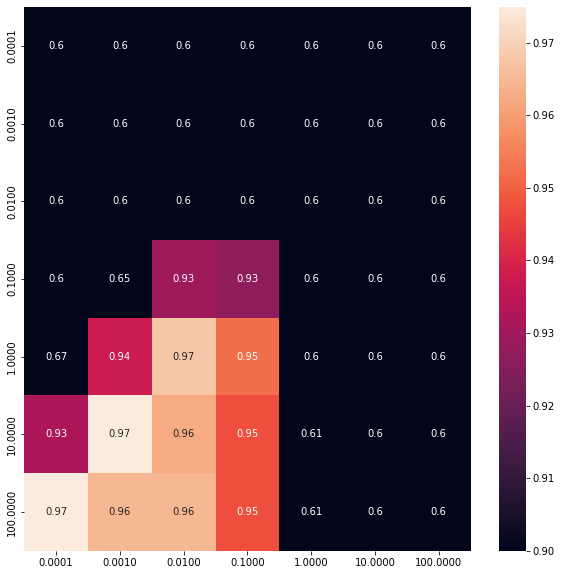

In [46]:
visualize.gridsearch_heatmap(gridsearch, param_grid, vmin = 0.9)

What do you see? How do you explain this? Now, zoom in on the parameters. Take the area with the best heatspot and increase the granularity.

In [47]:
# Set parameter grid
param_grid = {'svm__C': [*range(1, 100, 5)],
              'svm__gamma': np.linspace(0.0001, 0.04, 25)}
# create pipe
gridsearch = GridSearchCV(pipe, param_grid=param_grid, cv=3)
# fit the model
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51,
                                    56, 61, 66, 71, 76, 81, 86, 91, 96],
                         'svm__gamma': array([0.0001   , 0.0017625, 0.003425 , 0.0050875, 0.00675  , 0.0084125,
       0.010075 , 0.0117375, 0.0134   , 0.0150625, 0.016725 , 0.0183875,
       0.02005  , 0.0217125, 0.023375 , 0.0250375, 0.0267   , 0.0283625,
       0.030025 , 0.0316875, 0.03335  , 0.0350125, 0.036675 , 0.0383375,
       0.04     ])})

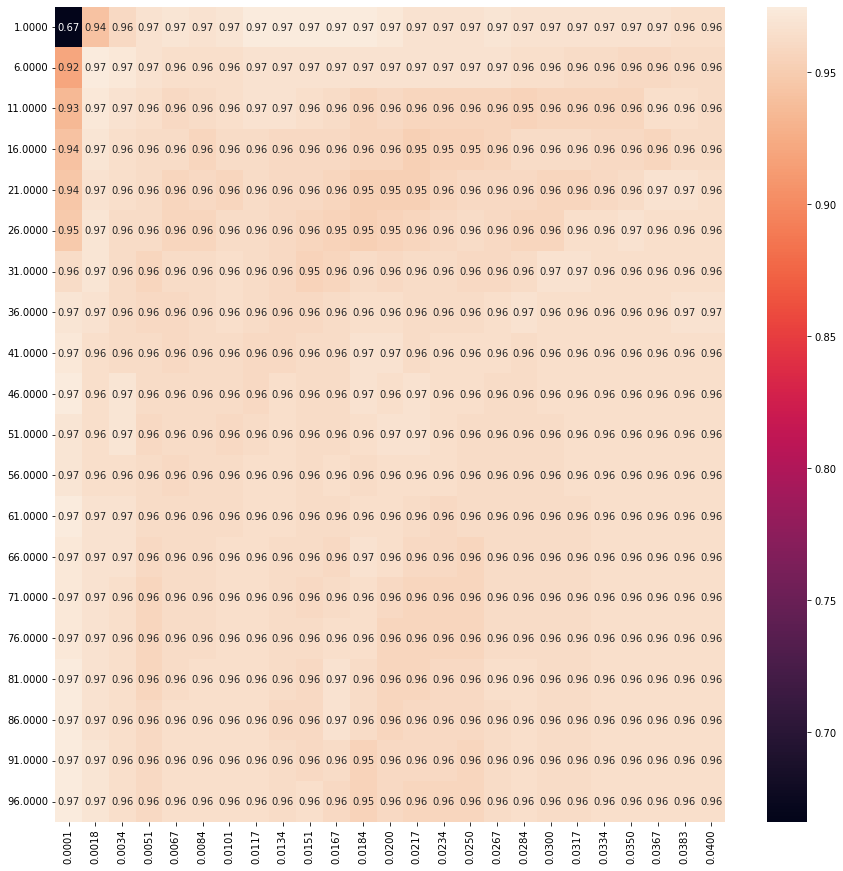

In [48]:
# increase the imagesize, so you can read the numbers
visualize.gridsearch_heatmap(gridsearch, param_grid, figsize=(15,15))

Print the best scores.

In [49]:
print(gridsearch.best_score_)
print(gridsearch.score(X_test, y_test))
print(gridsearch.best_params_)

0.9748803827751195
0.9941520467836257
{'svm__C': 6, 'svm__gamma': 0.0017625}


Can you figure out how you can manually pick another value then the `best_score_`?
Hint: look at the `set_params` method on the pipe. Fit and score the pipe with manually parameters, without running a gridsearch.

 What would you want to do that? At what point in the process is this a smart move? 
 Based on what would you pick another value?

In [50]:
pipe.set_params(svm__C = 11, svm__gamma = 0.0163)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9824561403508771

Can you figure out how to add another kernel ("sigmoid") to the pipe? Read the documentation
from sklearn on SVC to find out your options.

You should not change it in the pipe itself: the pipe should just have `SVC()`
as a model. But add the "sigmoid" kernel as an option via the `param_grid` dictionary.

In [56]:
param_grid = {'svm__C': [10**x for x in range(-4,3)],
              'svm__gamma': [10**x for x in range(-4,3)],
              'svm__kernel': ['sigmoid']}

gridsearch = GridSearchCV(pipe, param_grid=param_grid, cv=3)

# Fit GridSearchCV
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(C=11, gamma=0.0163))]),
             param_grid={'svm__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'svm__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'svm__kernel': ['sigmoid']})

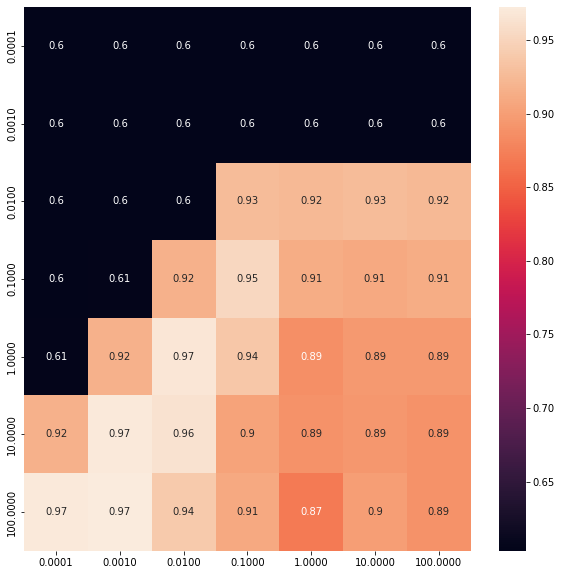

In [57]:
visualize.gridsearch_heatmap(gridsearch, param_grid)

In [58]:
print(gridsearch.best_score_)
print(gridsearch.score(X_test, y_test))
print(gridsearch.best_params_)

0.9723931039720514
0.9824561403508771
{'svm__C': 100, 'svm__gamma': 0.001, 'svm__kernel': 'sigmoid'}


Let's zoom in on the best parameter range:

In [59]:
param_grid = {'svm__C': np.arange(1, 150, 10),
              'svm__gamma': np.linspace(0.0001, 0.01, 20),
              'svm__kernel': ['sigmoid']}

gridsearch = GridSearchCV(pipe, param_grid=param_grid, cv=3)

# Fit GridSearchCV
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(C=11, gamma=0.0163))]),
             param_grid={'svm__C': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141]),
                         'svm__gamma': array([0.0001    , 0.00062105, 0.00114211, 0.00166316, 0.00218421,
       0.00270526, 0.00322632, 0.00374737, 0.00426842, 0.00478947,
       0.00531053, 0.00583158, 0.00635263, 0.00687368, 0.00739474,
       0.00791579, 0.00843684, 0.00895789, 0.00947895, 0.01      ]),
                         'svm__kernel': ['sigmoid']})

In [60]:
model = [*pipe.named_steps][-1]
assert pipe.named_steps[model].kernel =='rbf' and gridsearch.best_estimator_.named_steps[model].kernel == 'sigmoid'

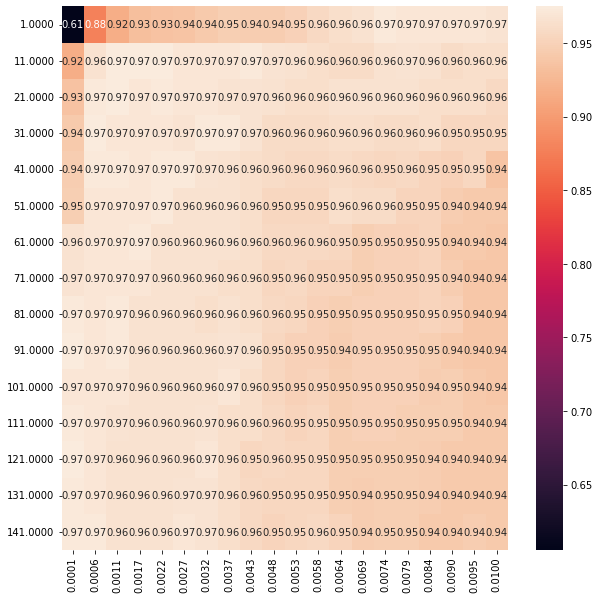

In [61]:
visualize.gridsearch_heatmap(gridsearch, param_grid)

In [62]:
print(gridsearch.best_score_)
print(gridsearch.score(X_test, y_test))
print(gridsearch.best_params_)

0.9748803827751195
0.9883040935672515
{'svm__C': 11, 'svm__gamma': 0.0011421052631578948, 'svm__kernel': 'sigmoid'}


Can you figure out how to switch the SVC for a `RandomForestClassifier` in the pipe? Read the documentation from `sklearn`, and do a gridsearch on different numbers of `n_estimators`. Take a range you suspect to be interesting based on the documentation.

In [63]:
from sklearn.ensemble import RandomForestClassifier

# Build pipeline
pipe = Pipeline(
    [
        ("scaler", StandardScaler()), # we add a scaler
        ("rf", RandomForestClassifier()) # and a model
    ]
)

param_grid = {'rf__n_estimators': [i for i in range(10, 100, 2)]}

gridsearch = GridSearchCV(pipe, param_grid=param_grid, cv=3)

# Fit GridSearchCV
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__n_estimators': [10, 12, 14, 16, 18, 20, 22, 24,
                                              26, 28, 30, 32, 34, 36, 38, 40,
                                              42, 44, 46, 48, 50, 52, 54, 56,
                                              58, 60, 62, 64, 66, 68, ...]})

In [64]:
print(gridsearch.best_score_)
print(gridsearch.score(X_test, y_test))
print(gridsearch.best_params_)

0.9647793726741094
0.9473684210526315
{'rf__n_estimators': 48}


How does this compare to the SVC? Can you plot the result for the different values of `n_estimators`? How does this compare to the `SVC`? How certain are you of the results on onseen data, based on these results? Which one would you pick, just based on these results?

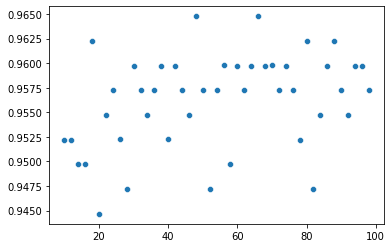

In [65]:
mean = gridsearch.cv_results_['mean_test_score']
x = [*param_grid.values()][0]
sns.scatterplot(x = x, y = mean);